In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, precision_recall_curve, recall_score, roc_curve, auc, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = load_svmlight_file('data/demo-g1-1901-filtered.txt')
X,y=data[0],data[1]
X_s,y_s=resample(X,y,n_samples=150000,replace=False)
X_train,X_test,y_train,y_test = train_test_split(X_s,y_s,test_size=.3,random_state=42)

In [4]:
rfc = RandomForestClassifier(n_estimators=300,max_depth=None,n_jobs=-1,verbose=1)

In [5]:
rfc.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 42.7min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [7]:
def model_eva(model,X_test,y_test):
    y_test_pred_proba=model.predict_proba(X_test)
    y_test_pred=model.predict(X_test)
    fpr,tpr,threshold=roc_curve(y_test,y_test_pred_proba[:,0],pos_label=1)
    print('precision_score:',precision_score(y_test,y_test_pred))
    print('auc:',auc(fpr,tpr))
    print(confusion_matrix(y_test,y_test_pred).T)
    plt.plot(fpr,tpr)
    plt.xlabel('fpt')
    plt.ylabel('tpr')
    plt.title('RoC')
    print(np.unique(y_test,return_counts=True))
    print(np.unique(y_test_pred,return_counts=True))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    7.4s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:   10.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    7.3s finished


precision_score: 0.7698078542448136
auc: 0.8286711572528995
[[20112  6014]
 [ 5405 13469]]
(array([1., 2.]), array([25517, 19483]))
(array([1., 2.]), array([26126, 18874]))


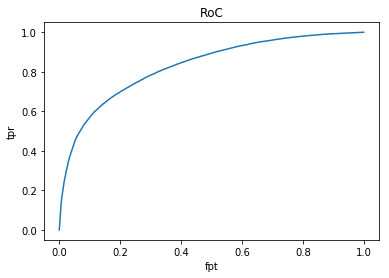

In [18]:
model_eva(rfc,X_test,y_test)

In [15]:
rfc_200_20 = RandomForestClassifier(n_estimators=200,max_depth=20,n_jobs=-1,verbose=1)
rfc_200_20.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   38.4s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.9s finished


precision_score: 0.647783320650489
auc: 0.7758014126710924
[[22984 12497]
 [ 2533  6986]]
(array([1., 2.]), array([25517, 19483]))
(array([1., 2.]), array([35481,  9519]))


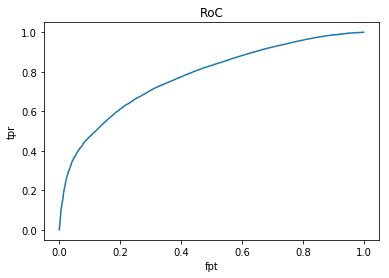

In [19]:
model_eva(rfc_200_20,X_test,y_test)

In [34]:
print(rfc.feature_importances_.shape)
index = np.arange(18338)
value=zip(index,rfc.feature_importances_)
l=sorted(value,key=lambda x:x[1],reverse=True)
r=l[:100]
mat_index=map(lambda x:x[0],r)
X_s_compact=X_s[:,list(mat_index)]
X_train,X_test,y_train,y_test = train_test_split(X_s_compact,y_s,test_size=.3,random_state=42)
X_train.shape

(18338,)


(105000, 100)

In [29]:
rfc_200_20_imp = RandomForestClassifier(n_estimators=200,max_depth=20,n_jobs=-1,verbose=1)
rfc_200_20_imp.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.8min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    2.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    1.8s finished


precision_score: 0.758581620549861
auc: 0.7896915315156114
[[42850 13637]
 [16582 31931]]
(array([1., 2.]), array([59432, 45568]))
(array([1., 2.]), array([56487, 48513]))


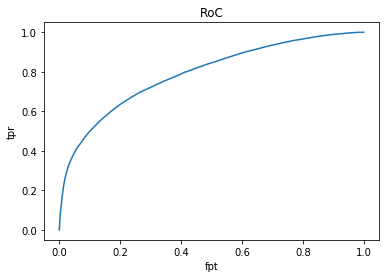

In [35]:
model_eva(rfc_200_20_imp,X_train,y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.8s finished


precision_score: 0.7614373648311429
auc: 0.7911289888970688
[[18308  5736]
 [ 7145 13811]]
(array([1., 2.]), array([25453, 19547]))
(array([1., 2.]), array([24044, 20956]))


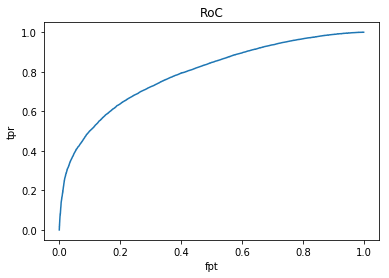

In [36]:
model_eva(rfc_200_20_imp,X_test,y_test)

In [14]:
data = load_svmlight_file('data/demo-g1-v2.txt')
X,y=data[0],data[1]
X_s,y_s=resample(X,y,n_samples=150000,replace=False)
X_train,X_test,y_train,y_test = train_test_split(X_s,y_s,test_size=.3,random_state=42)

In [38]:
rfc = RandomForestClassifier(n_estimators=300,max_depth=None,n_jobs=-1,verbose=1)

In [39]:
rfc.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 20.4min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    9.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    7.1s finished


precision_score: 0.734266252036132
auc: 0.7620832821147558
[[19834  7178]
 [ 6205 11783]]
(array([1., 2.]), array([26039, 18961]))
(array([1., 2.]), array([27012, 17988]))


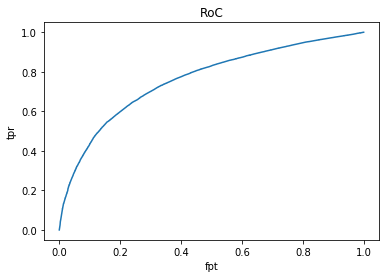

In [40]:
model_eva(rfc,X_test,y_test)

In [15]:
rfc_200_20 = RandomForestClassifier(n_estimators=200,max_depth=20,n_jobs=-1,verbose=1)
rfc_200_20.fit(X_train,y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   36.6s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.9s finished


precision_score: 0.6349709726093962
auc: 0.7702236794491529
[[24828 14273]
 [ 1360  4539]]
(array([1., 2.]), array([26188, 18812]))
(array([1., 2.]), array([39101,  5899]))


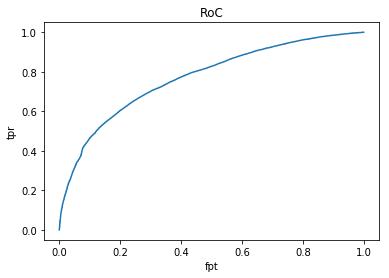

In [16]:
model_eva(rfc_200_20,X_test,y_test)

In [17]:
print(rfc_200_20.feature_importances_.shape)
index = np.arange(rfc_200_20.feature_importances_.shape[0])
value=zip(index,rfc_200_20.feature_importances_)
l=sorted(value,key=lambda x:x[1],reverse=True)
r=l[:100]
mat_index=map(lambda x:x[0],r)
X_s_compact=X_s[:,list(mat_index)]
X_train,X_test,y_train,y_test = train_test_split(X_s_compact,y_s,test_size=.3,random_state=42)
X_train.shape

(7672,)


(105000, 100)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   45.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.8s finished


precision_score: 0.7422483580265771
auc: 0.7709908204844468
[[19438  6750]
 [ 6750 12062]]
(array([1., 2.]), array([26188, 18812]))
(array([1., 2.]), array([26188, 18812]))


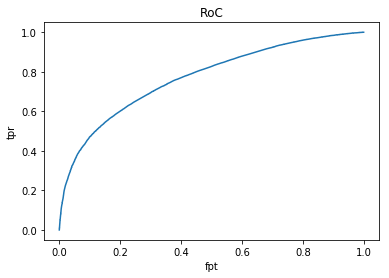

In [18]:
rfc_200_20_imp = RandomForestClassifier(n_estimators=200,max_depth=20,n_jobs=-1,verbose=1)
rfc_200_20_imp.fit(X_train,y_train)
model_eva(rfc_200_20_imp,X_test,y_test)

In [32]:
data = load_svmlight_file('data/demo-g3-v2.txt')
X,y=data[0],data[1]
X_s,y_s=resample(X,y,n_samples=150000,replace=False)

index = np.arange(rfc_200_20.feature_importances_.shape[0])
value=zip(index,rfc_200_20.feature_importances_)
l=sorted(value,key=lambda x:x[1],reverse=True)
r=l[:100]
mat_index=map(lambda x:x[0],r)
X_s_compact=X_s[:,list(mat_index)]
X_train,X_test,y_train,y_test = train_test_split(X_s_compact,y_s,test_size=.3,random_state=42)

In [33]:
rfc_200_20_imp_g3 = RandomForestClassifier(n_estimators=200,max_depth=20,n_jobs=-1,verbose=1)
rfc_200_20_imp_g3.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.3min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [34]:
def model_eva_multiclass(model,X_test,y_test):
    y_test_pred=model.predict(X_test)
    print('precision_score:',precision_score(y_test,y_test_pred,average='macro'))
    print(confusion_matrix(y_test,y_test_pred).T)
    print(np.unique(y_test,return_counts=True))
    print(np.unique(y_test_pred,return_counts=True))

In [35]:
model_eva_multiclass(rfc_200_20_imp_g3,X_test,y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s


precision_score: 0.16988680270488485
[[ 683  417  460  338  333  251  212  143   90   61  131]
 [  11    4    1    3    3    1    1    1    1    0    3]
 [ 146  132  221  196  200  153   85   57   37   43   40]
 [ 204  151  518  772  724  589  381  233  157   87  140]
 [ 583  507 1103 1465 1596 1446 1102  761  533  432  634]
 [ 170  134  423  668  956  891  700  568  417  324  450]
 [  14   19   49   80  111  129  116  109   68   48   52]
 [   7    4   27   49   54   69   67   67   44   21   34]
 [   1    1    2    3    5    9   11   16    9   12   10]
 [   1    0    3    4    6   10   13    5   13   13   11]
 [ 382  360  931 1201 1754 1987 1970 1963 1849 1924 5006]]
(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]), array([2202, 1729, 3738, 4779, 5742, 5535, 4658, 3923, 3218, 2965, 6511]))
(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]), array([ 3119,    29,  1310,  3956, 10162,  5701,   795,   443,    79,
          79, 19327]))


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    1.8s finished


In [36]:
data = load_svmlight_file('data/demo-g1.txt')
X,y=data[0],data[1]
X_s,y_s=resample(X,y,n_samples=150000,replace=False)
X_train,X_test,y_train,y_test = train_test_split(X_s,y_s,test_size=.3,random_state=42)

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
gbc_clf = GradientBoostingClassifier(n_estimators=100,max_depth=2,verbose=1)
gbc_clf.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3432            3.87m
         2           1.3220            3.43m
         3           1.3043            3.31m
         4           1.2892            3.29m
         5           1.2765            3.24m
         6           1.2657            3.17m
         7           1.2563            3.13m
         8           1.2481            3.05m
         9           1.2412            3.01m
        10           1.2352            2.98m
        20           1.2018            2.66m
        30           1.1847            2.42m
        40           1.1721            2.08m
        50           1.1621            1.71m
        60           1.1544            1.35m
        70           1.1471            1.02m
        80           1.1411           40.69s
        90           1.1360           20.48s
       100           1.1318            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=1, warm_start=False)

precision_score: 0.7418820525207909
auc: 0.7764343902491635
[[42998 14960]
 [16480 30562]]
(array([1., 2.]), array([59478, 45522]))
(array([1., 2.]), array([57958, 47042]))


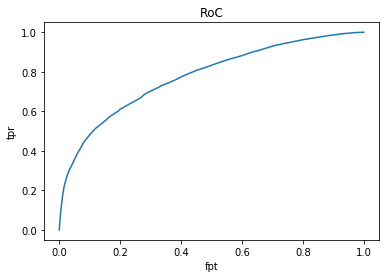

In [41]:
model_eva(gbc_clf,X_train,y_train)

precision_score: 0.7398045707825244
auc: 0.7717771676003262
[[18322  6444]
 [ 7074 13160]]
(array([1., 2.]), array([25396, 19604]))
(array([1., 2.]), array([24766, 20234]))


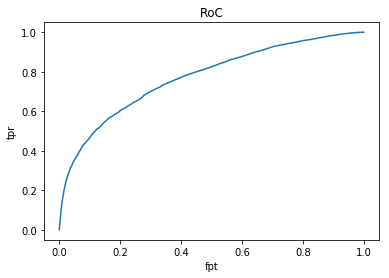

In [42]:
model_eva(gbc_clf,X_test,y_test)

In [4]:
import xgboost as xgb

In [ ]:
#       val xgbParam = Map("eta" -> 0.01f,
#         "max_depth" -> 7,
#         "objective" -> "multi:softprob",
#         "colsample_bytree" ->   .8,
#         "min_child_weight" -> 6,
# //        "sketch_eps"-> 0.99,
# //        "colsample_bylevel"->0.1,
#         "num_class" -> localIdMap(i.toInt),
#         "num_round" -> NUM_ROUND)

In [5]:
# xgb_clf = xgb.XGBClassifier(
#                  colsample_bytree=0.2,
#                  gamma=0.0,
#                  learning_rate=0.01,
#                  max_depth=12,
#                  min_child_weight=1.5,
#                  n_estimators=1000,                                                                  
#                  reg_alpha=0.9,
#                  reg_lambda=0.6,
#                  subsample=0.2,
#                  seed=42,
#                  silent=1)
xgb_clf = xgb.XGBClassifier(
                 learning_rate=0.01,
                 max_depth=7,
                 colsample_bytree=0.8,
                 min_child_weight=6,
                 n_estimators=1000,                                                                  
#                  reg_alpha=0.9,
#                  reg_lambda=0.6,
#                  subsample=0.2,
                 seed=42,
                 silent=0)
xgb_clf.fit(X_train,y_train)

[15:32:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 0 pruned nodes, max_depth=7
[15:32:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=7
[15:32:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_depth=7
[15:32:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 0 pruned nodes, max_depth=7
[15:32:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=7
[15:32:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=7
[15:32:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 174 extra nodes, 0 pruned nodes, max_depth=7
[15:32:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 172 extra nodes, 0 pruned nodes, max_depth=7
[15:32:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 172 extra nodes, 0 pruned no

[15:33:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 170 extra nodes, 0 pruned nodes, max_depth=7
[15:33:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 170 extra nodes, 0 pruned nodes, max_depth=7
[15:33:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned nodes, max_depth=7
[15:33:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 0 pruned nodes, max_depth=7
[15:33:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_depth=7
[15:33:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 0 pruned nodes, max_depth=7
[15:33:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 0 pruned nodes, max_depth=7
[15:33:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=7
[15:33:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 172 extra nodes, 0 pruned no

[15:33:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=7
[15:33:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 148 extra nodes, 0 pruned nodes, max_depth=7
[15:33:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_depth=7
[15:33:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned nodes, max_depth=7
[15:33:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=7
[15:33:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_depth=7
[15:33:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=7
[15:33:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=7
[15:33:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned no

[15:33:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 0 pruned nodes, max_depth=7
[15:33:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=7
[15:33:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_depth=7
[15:33:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 148 extra nodes, 0 pruned nodes, max_depth=7
[15:33:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=7
[15:33:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=7
[15:33:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=7
[15:33:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 0 pruned nodes, max_depth=7
[15:33:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nod

[15:34:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=7
[15:34:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=7
[15:34:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=7
[15:34:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=7
[15:34:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=7
[15:34:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=7
[15:34:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=7
[15:34:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=7
[15:34:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned no

[15:34:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=7
[15:34:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=7
[15:34:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=7
[15:34:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=7
[15:34:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=7
[15:34:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=7
[15:34:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=7
[15:34:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=7
[15:34:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes

[15:34:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=7
[15:34:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=7
[15:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=7
[15:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=7
[15:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=7
[15:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=7
[15:34:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=7
[15:34:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=7
[15:34:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, ma

[15:35:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=7
[15:35:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=7
[15:35:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=7
[15:35:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=7
[15:35:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=7
[15:35:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=7
[15:35:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=7
[15:35:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=7
[15:35:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_

[15:35:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=7
[15:35:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=7
[15:35:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=7
[15:35:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=7
[15:35:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=7
[15:35:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=7
[15:35:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=7
[15:35:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=7
[15:35:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_

[15:35:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=7
[15:35:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=7
[15:35:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=7
[15:35:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=7
[15:35:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=7
[15:35:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=7
[15:35:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=7
[15:35:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=7
[15:35:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_

[15:35:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=7
[15:35:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=7
[15:35:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=7
[15:35:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=7
[15:35:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=7
[15:35:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=7
[15:35:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=7
[15:35:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=7
[15:35:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_

[15:36:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=7
[15:36:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=7
[15:36:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=7
[15:36:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=7
[15:36:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=7
[15:36:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=7
[15:36:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=7
[15:36:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=7
[15:36:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_

[15:36:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=7
[15:36:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=7
[15:36:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=7
[15:36:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=7
[15:36:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=7
[15:36:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=7
[15:36:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=7
[15:36:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=7
[15:36:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_

[15:36:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=7
[15:36:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=7
[15:36:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=7
[15:36:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=7
[15:36:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=7
[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=7
[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=7
[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=7
[15:36:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=7, min_child_weight=6, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=0,
       subsample=1)

precision_score: 0.7823304280706268
auc: 0.8134312704271992
[[48650 13536]
 [14580 28234]]
(array([1., 2.]), array([63230, 41770]))
(array([1., 2.]), array([62186, 42814]))


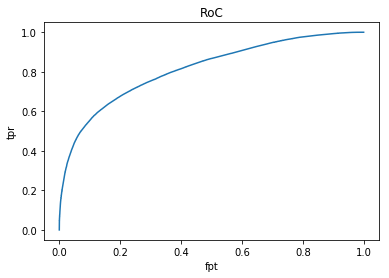

In [8]:
model_eva(xgb_clf,X_train,y_train)

precision_score: 0.7720049588639694
auc: 0.796842824074074
[[20550  6069]
 [ 6450 11931]]
(array([1., 2.]), array([27000, 18000]))
(array([1., 2.]), array([26619, 18381]))


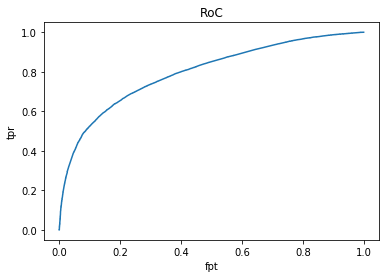

In [9]:
model_eva(xgb_clf,X_test,y_test)

precision_score: 0.7740798679754517
auc: 0.8211138407447224
[[45029 13142]
 [14449 32380]]
(array([1., 2.]), array([59478, 45522]))
(array([1., 2.]), array([58171, 46829]))


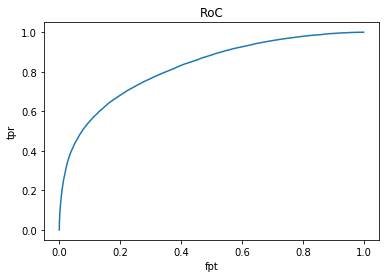

In [70]:
model_eva(xgb_clf,X_train,y_train)

precision_score: 0.7549963881531423
auc: 0.7960912440153438
[[18813  6105]
 [ 6583 13499]]
(array([1., 2.]), array([25396, 19604]))
(array([1., 2.]), array([24918, 20082]))


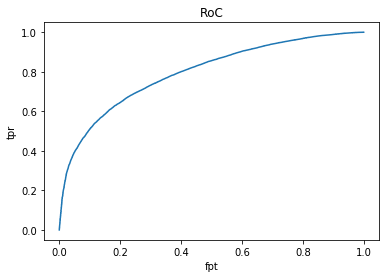

In [71]:
model_eva(xgb_clf,X_test,y_test)

precision_score: 0.7536261950452086
auc: 0.7917456838246535
[[43592 14251]
 [15886 31271]]
(array([1., 2.]), array([59478, 45522]))
(array([1., 2.]), array([57843, 47157]))


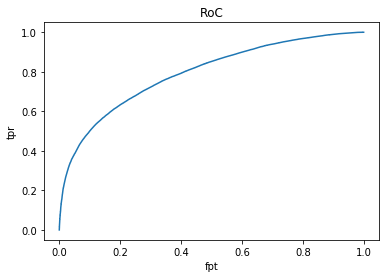

In [60]:
model_eva(xgb_clf,X_train,y_train)

precision_score: 0.74844494708781
auc: 0.7833812049858259
[[18530  6228]
 [ 6866 13376]]
(array([1., 2.]), array([25396, 19604]))
(array([1., 2.]), array([24758, 20242]))


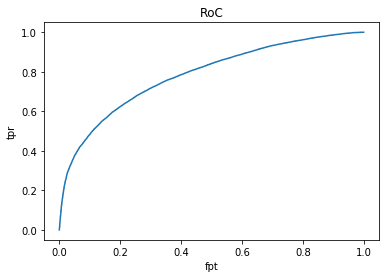

In [61]:
model_eva(xgb_clf,X_test,y_test)

precision_score: 0.7419896775087464
auc: 0.7754600475124311
[[42841 14897]
 [16637 30625]]
(array([1., 2.]), array([59478, 45522]))
(array([1., 2.]), array([57738, 47262]))


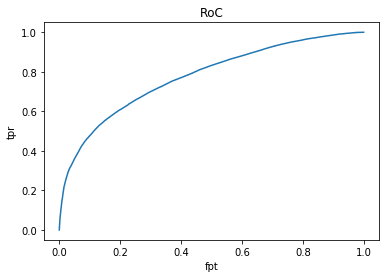

In [64]:
model_eva(xgb_clf,X_train,y_train)

precision_score: 0.7403939688715954
auc: 0.7702420520815214
[[18267  6405]
 [ 7129 13199]]
(array([1., 2.]), array([25396, 19604]))
(array([1., 2.]), array([24672, 20328]))


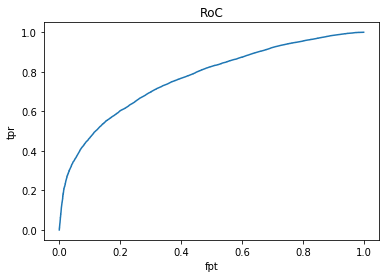

In [65]:
model_eva(xgb_clf,X_test,y_test)